# Diabetes Prediction - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the Pima Indians Diabetes dataset.

In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config
import utils

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(config.COLOR_PALETTE)
plt.rcParams['figure.figsize'] = config.FIGURE_SIZE

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Dataset

In [2]:
# Load data
df = utils.load_data()

# Display first few rows
print("\nFirst 5 rows:")
df.head()

Dataset loaded: 768 rows, 9 columns

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Dataset Overview

In [3]:
# Basic information
print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMemory Usage:\n{df.memory_usage(deep=True)}")

Dataset Information:
Shape: (768, 9)

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Memory Usage:
Index                        132
Pregnancies                 6144
Glucose                     6144
BloodPressure               6144
SkinThickness               6144
Insulin                     6144
BMI                         6144
DiabetesPedigreeFunction    6144
Age                         6144
Outcome                     6144
dtype: int64


In [4]:
# Statistical summary
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Missing Values Analysis

In [5]:
# Check for explicit missing values
print("Explicit Missing Values:")
print(df.isnull().sum())

# Check for zeros (medically impossible values)
print("\n" + "="*60)
print("Zero Values Analysis (Medical Impossibilities):")
print("="*60)

for feature in config.ZERO_AS_MISSING_FEATURES:
    zero_count = (df[feature] == 0).sum()
    zero_pct = (zero_count / len(df)) * 100
    print(f"{feature:25s}: {zero_count:3d} zeros ({zero_pct:5.2f}%)")

Explicit Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zero Values Analysis (Medical Impossibilities):
Glucose                  :   5 zeros ( 0.65%)
BloodPressure            :  35 zeros ( 4.56%)
SkinThickness            : 227 zeros (29.56%)
Insulin                  : 374 zeros (48.70%)
BMI                      :  11 zeros ( 1.43%)


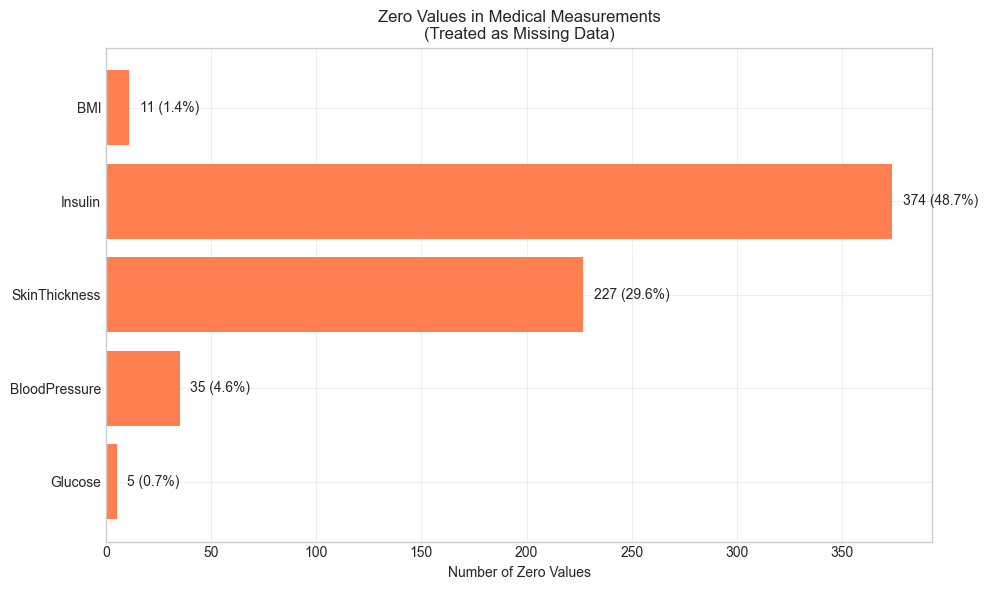

In [7]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(10, 6))

zero_counts = [(df[col] == 0).sum() for col in config.ZERO_AS_MISSING_FEATURES]
features = config.ZERO_AS_MISSING_FEATURES

bars = ax.barh(features, zero_counts, color='coral')
ax.set_xlabel('Number of Zero Values')
ax.set_title('Zero Values in Medical Measurements\n(Treated as Missing Data)')
ax.grid(True, alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, zero_counts)):
    pct = (count / len(df)) * 100
    ax.text(count + 5, i, f'{count} ({pct:.1f}%)', va='center')

plt.tight_layout()
plt.savefig(f'{config.FIGURES_DIR}/01_missing_values.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

## 4. Target Variable Distribution

Target Variable Distribution:

No Diabetes (0): 500 (65.10%)
Diabetes (1):    268 (34.90%)


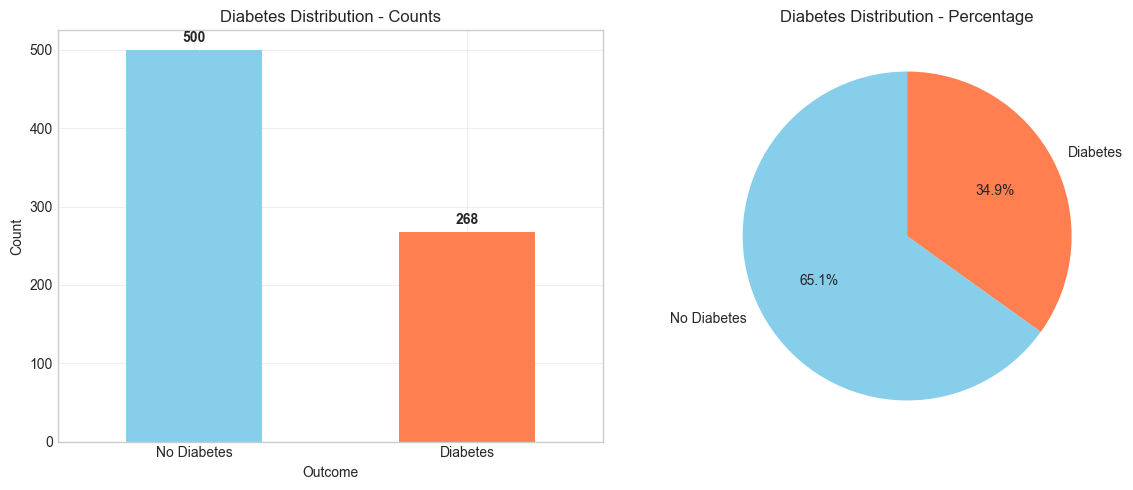

In [8]:
# Count and percentage
outcome_counts = df[config.TARGET_NAME].value_counts()
outcome_pct = df[config.TARGET_NAME].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
print(f"\nNo Diabetes (0): {outcome_counts[0]} ({outcome_pct[0]:.2f}%)")
print(f"Diabetes (1):    {outcome_counts[1]} ({outcome_pct[1]:.2f}%)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
outcome_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'coral'])
ax1.set_title('Diabetes Distribution - Counts')
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
ax1.grid(True, alpha=0.3)

# Add count labels
for i, v in enumerate(outcome_counts):
    ax1.text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['skyblue', 'coral']
ax2.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Diabetes Distribution - Percentage')

plt.tight_layout()
plt.savefig(f'{config.FIGURES_DIR}/02_target_distribution.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

## 5. Feature Distributions

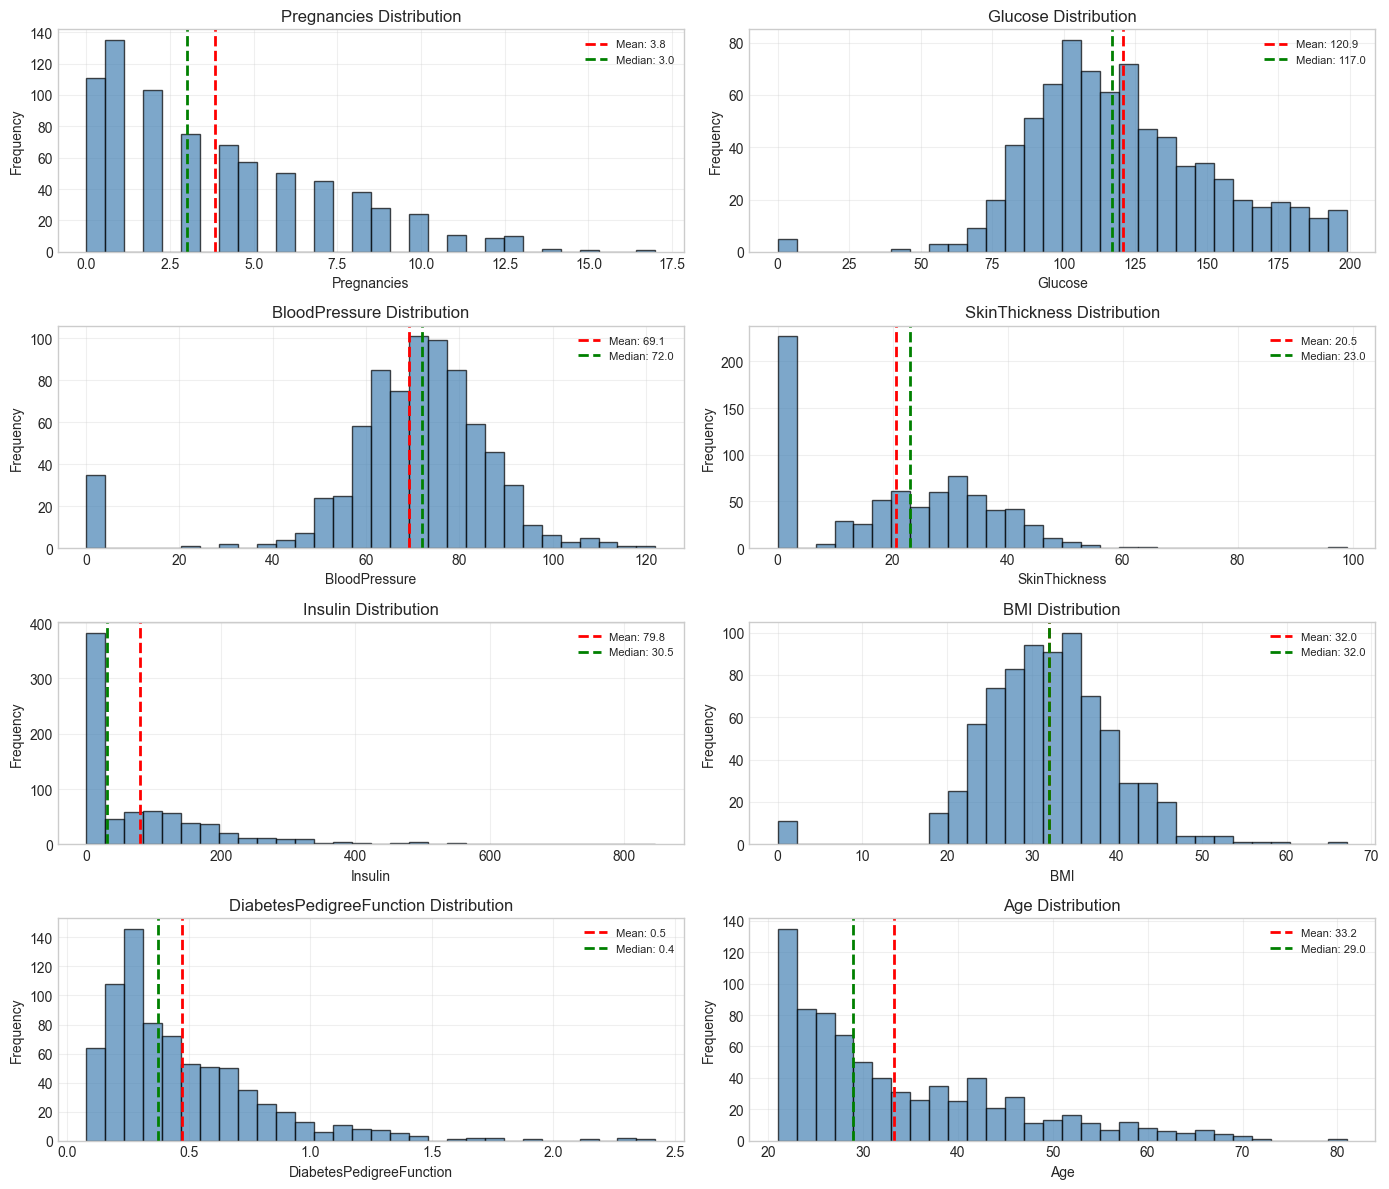

In [9]:
# Histograms for all features
fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, feature in enumerate(config.FEATURE_NAMES):
    ax = axes[idx]
    
    # Plot histogram
    ax.hist(df[feature], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)
    
    # Add statistics
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.savefig(f'{config.FIGURES_DIR}/03_feature_distributions.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

## 6. Feature Distributions by Outcome

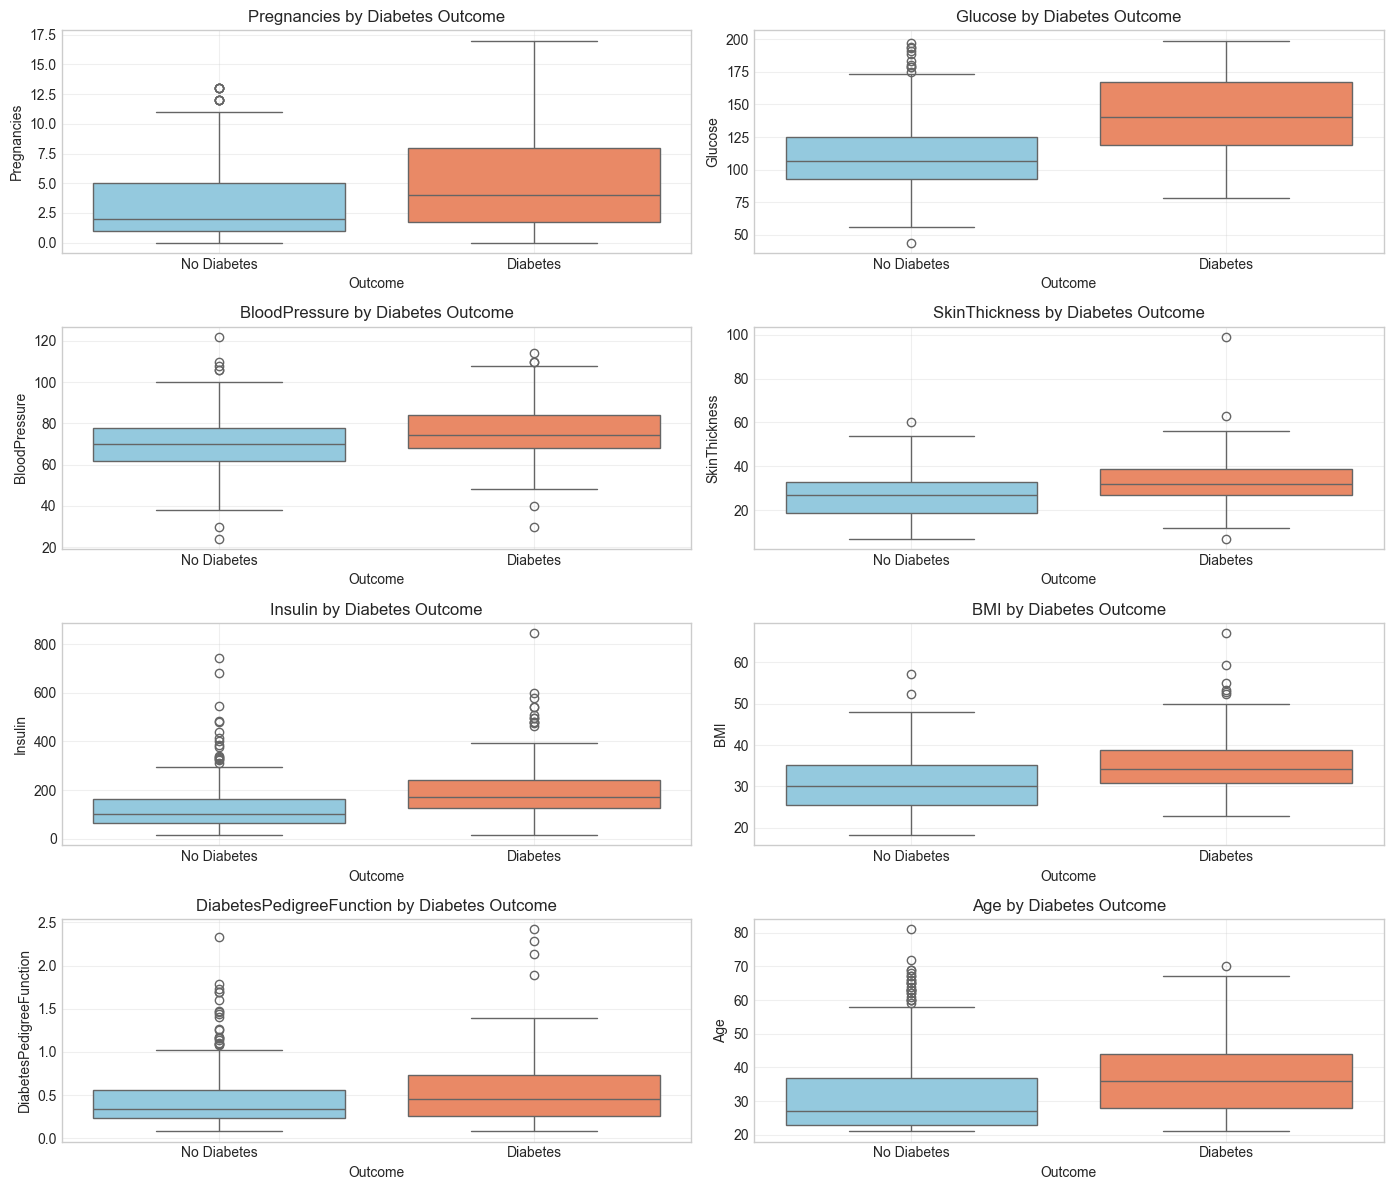

In [10]:
# Box plots comparing features by outcome
fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, feature in enumerate(config.FEATURE_NAMES):
    ax = axes[idx]
    
    # Create box plot
    df_no_zeros = df[df[feature] > 0] if feature in config.ZERO_AS_MISSING_FEATURES else df
    sns.boxplot(data=df_no_zeros, x=config.TARGET_NAME, y=feature, ax=ax, palette=['skyblue', 'coral'])
    ax.set_title(f'{feature} by Diabetes Outcome')
    ax.set_xlabel('Outcome')
    ax.set_xticklabels(['No Diabetes', 'Diabetes'])
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{config.FIGURES_DIR}/04_features_by_outcome.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

## 7. Correlation Analysis

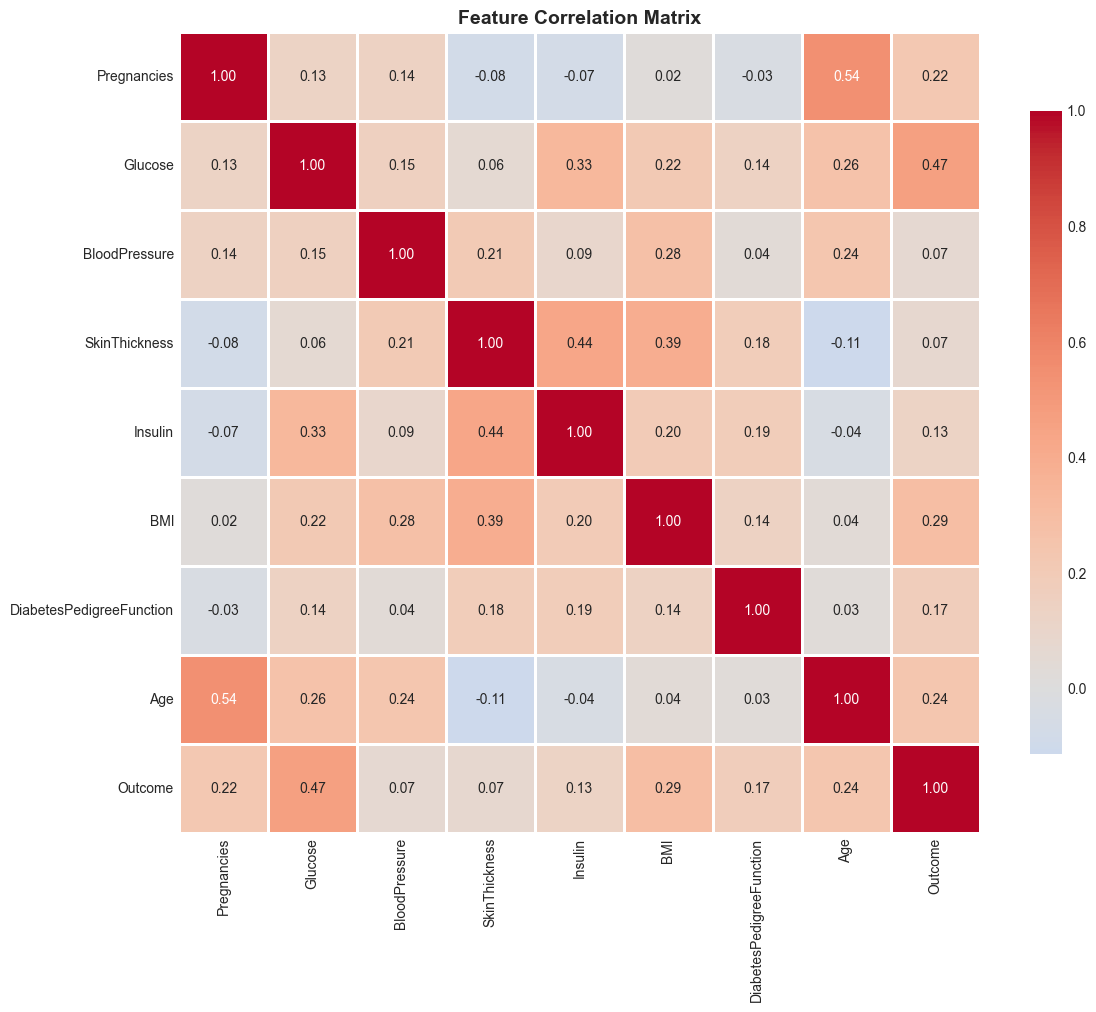


Correlation with Outcome (Target):
Glucose                       :  0.467
BMI                           :  0.293
Age                           :  0.238
Pregnancies                   :  0.222
DiabetesPedigreeFunction      :  0.174
Insulin                       :  0.131
SkinThickness                 :  0.075
BloodPressure                 :  0.065


In [11]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f', cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{config.FIGURES_DIR}/05_correlation_matrix.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

# Show correlations with target
print("\nCorrelation with Outcome (Target):")
print("="*40)
target_corr = correlation_matrix[config.TARGET_NAME].sort_values(ascending=False)
for feature, corr in target_corr.items():
    if feature != config.TARGET_NAME:
        print(f"{feature:30s}: {corr:6.3f}")

## 8. Pair Plot (Sample of Features)

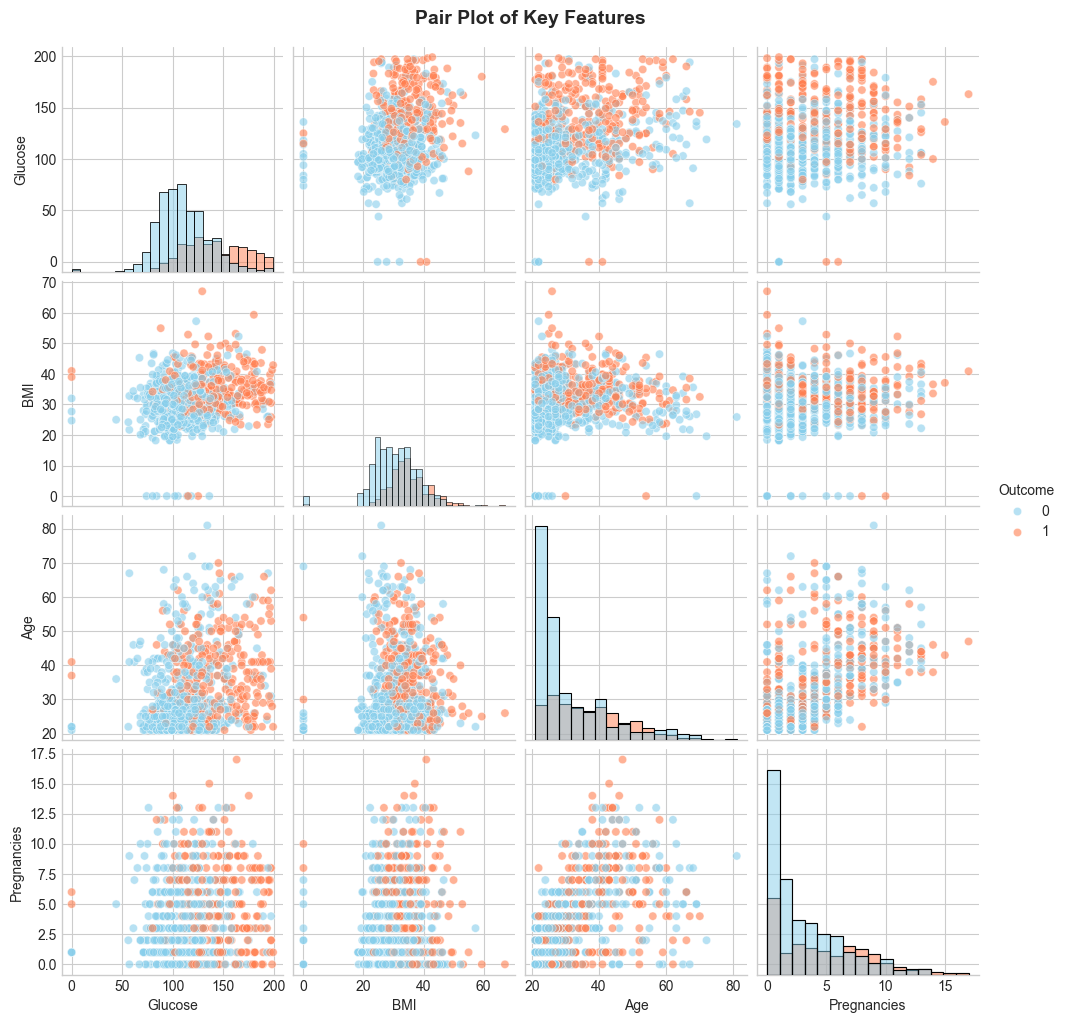

In [12]:
# Select most correlated features for pair plot
top_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', config.TARGET_NAME]
df_subset = df[top_features].copy()

# Create pair plot
pairplot = sns.pairplot(df_subset, hue=config.TARGET_NAME, 
                        palette={0: 'skyblue', 1: 'coral'},
                        plot_kws={'alpha': 0.6},
                        diag_kind='hist')
pairplot.fig.suptitle('Pair Plot of Key Features', y=1.02, fontsize=14, fontweight='bold')
plt.savefig(f'{config.FIGURES_DIR}/06_pairplot.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

## 9. Age Distribution Analysis

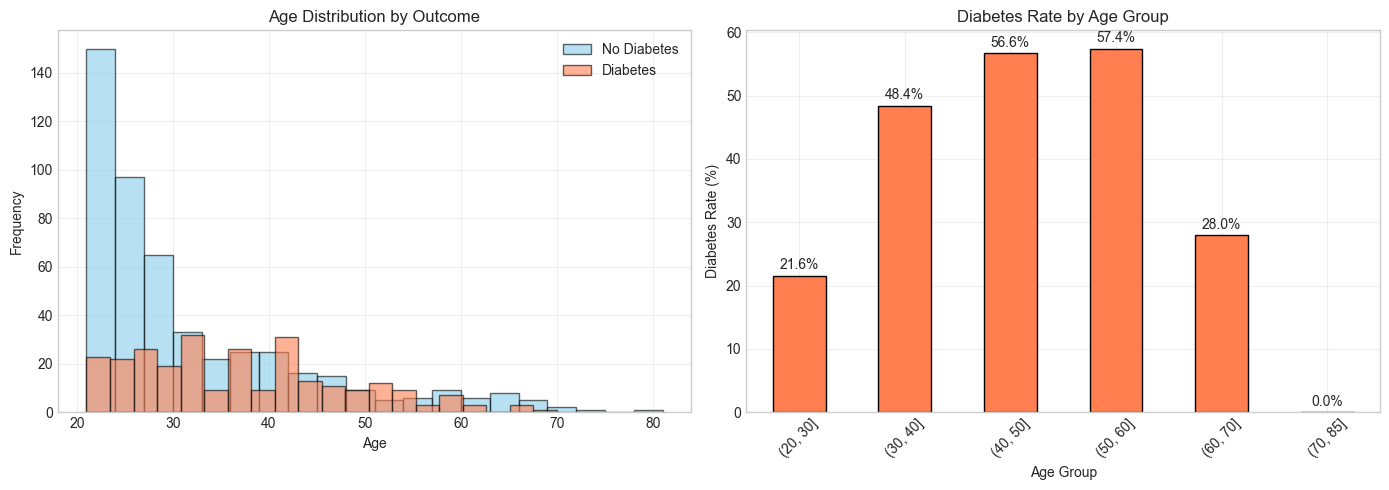

In [13]:
# Age distribution by outcome
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram comparison
axes[0].hist(df[df[config.TARGET_NAME] == 0]['Age'], bins=20, alpha=0.6, 
             label='No Diabetes', color='skyblue', edgecolor='black')
axes[0].hist(df[df[config.TARGET_NAME] == 1]['Age'], bins=20, alpha=0.6, 
             label='Diabetes', color='coral', edgecolor='black')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution by Outcome')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Diabetes rate by age group
age_bins = [20, 30, 40, 50, 60, 70, 85]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)
diabetes_rate = df.groupby('AgeGroup')[config.TARGET_NAME].mean() * 100

diabetes_rate.plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Diabetes Rate (%)')
axes[1].set_title('Diabetes Rate by Age Group')
axes[1].set_xticklabels(diabetes_rate.index, rotation=45)
axes[1].grid(True, alpha=0.3)

# Add percentage labels
for i, v in enumerate(diabetes_rate):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.savefig(f'{config.FIGURES_DIR}/07_age_analysis.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

# Remove temporary column
df.drop('AgeGroup', axis=1, inplace=True)

## 10. Key Insights Summary

In [14]:
print("\n" + "="*80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(df)}")
print(f"   - Features: {len(config.FEATURE_NAMES)}")
print(f"   - Diabetes prevalence: {(df[config.TARGET_NAME].sum() / len(df) * 100):.2f}%")

print("\n2. DATA QUALITY ISSUES:")
for feature in config.ZERO_AS_MISSING_FEATURES:
    zero_count = (df[feature] == 0).sum()
    if zero_count > 0:
        print(f"   - {feature}: {zero_count} zeros ({(zero_count/len(df)*100):.1f}%) - needs imputation")

print("\n3. TOP CORRELATIONS WITH DIABETES:")
top_3 = target_corr.drop(config.TARGET_NAME).head(3)
for feature, corr in top_3.items():
    print(f"   - {feature}: {corr:.3f}")

print("\n4. CLASS IMBALANCE:")
print(f"   - No Diabetes: {outcome_counts[0]} samples ({outcome_pct[0]:.1f}%)")
print(f"   - Diabetes: {outcome_counts[1]} samples ({outcome_pct[1]:.1f}%)")
print(f"   - Imbalance ratio: 1:{(outcome_counts[0]/outcome_counts[1]):.2f}")

print("\n" + "="*80)
print("NEXT STEPS:")
print("  1. Handle missing values (zeros) through imputation")
print("  2. Apply feature scaling for algorithms sensitive to feature magnitudes")
print("  3. Consider stratified sampling to maintain class distribution")
print("="*80 + "\n")


KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total samples: 768
   - Features: 8
   - Diabetes prevalence: 34.90%

2. DATA QUALITY ISSUES:
   - Glucose: 5 zeros (0.7%) - needs imputation
   - BloodPressure: 35 zeros (4.6%) - needs imputation
   - SkinThickness: 227 zeros (29.6%) - needs imputation
   - Insulin: 374 zeros (48.7%) - needs imputation
   - BMI: 11 zeros (1.4%) - needs imputation

3. TOP CORRELATIONS WITH DIABETES:
   - Glucose: 0.467
   - BMI: 0.293
   - Age: 0.238

4. CLASS IMBALANCE:
   - No Diabetes: 500 samples (65.1%)
   - Diabetes: 268 samples (34.9%)
   - Imbalance ratio: 1:1.87

NEXT STEPS:
  1. Handle missing values (zeros) through imputation
  2. Apply feature scaling for algorithms sensitive to feature magnitudes
  3. Consider stratified sampling to maintain class distribution

